In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

2024-08-07 22:19:52.733455: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train = np.load('/Users/sailaharimullapudi/Desktop/data_24/Npy_files/x_train.npy') 
y_train = np.load('/Users/sailaharimullapudi/Desktop/data_24/Npy_files/y_train.npy')  
x_test = np.load('/Users/sailaharimullapudi/Desktop/data_24/Npy_files/x_test.npy')    
y_test = np.load('/Users/sailaharimullapudi/Desktop/data_24/Npy_files/y_test.npy') 

In [3]:
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

In [4]:
model = Sequential()
model.add(LSTM(128, input_shape=(19, 500), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

/Users/sailaharimullapudi/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train_encoded, epochs=20, batch_size=64, validation_split=0.1)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 30s 135ms/step - accuracy: 0.5005 - loss: 1.1203 - val_accuracy: 0.6225 - val_loss: 0.9458
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.6417 - loss: 0.8654 - val_accuracy: 0.6681 - val_loss: 0.8378
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.7013 - loss: 0.7788 - val_accuracy: 0.6866 - val_loss: 0.8008
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.7161 - loss: 0.7351 - val_accuracy: 0.7222 - val_loss: 0.7250
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.7423 - loss: 0.6829 - val_accuracy: 0.7336 - val_loss: 0.6965
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.7676 - loss: 0.6238 - val_accuracy: 0.7407 - val_loss: 0.7048
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.7668 - loss: 0.6182 - val_accuracy: 0.7635 - val_loss: 0.6692
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.7765 - loss: 0.5835 - val_accuracy:

In [7]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)
print(f'Test Accuracy: {accuracy}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8437 - loss: 0.4832
Test Accuracy: 0.8369704484939575


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


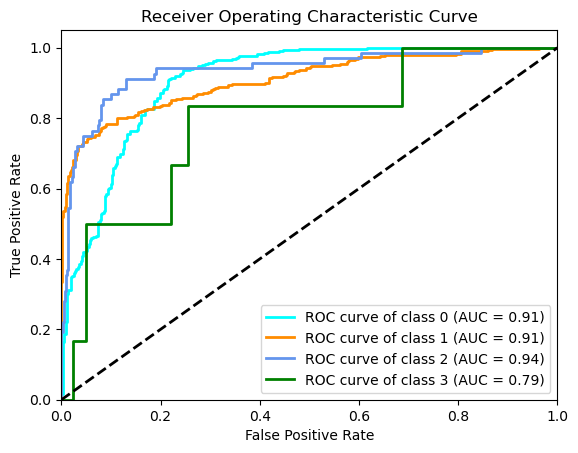

In [18]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize
# from itertools import cycle

# y_pred = model.predict(x_test)

# n_classes = y_test_encoded.shape[1]
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# plt.figure()
# colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2,
#              label='ROC curve of class {0} (AUC = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=2)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [22]:
np.argmax(y_test, axis=0)

11

In [28]:
print(y_test)

[2 2 1 1 1 0 0 0 1 0 1 3 0 1 0 0 1 0 0 1 0 0 0 2 0 0 0 0 1 1 0 0 1 0 1 1 2
 2 1 2 1 2 0 0 1 0 1 2 1 0 1 0 1 1 0 0 0 2 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1
 0 1 0 2 1 0 1 0 1 1 0 1 2 1 0 2 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 2 0 1 2 0 1 2 1 0 0 2 2 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 1 0 2 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 3 0 0 1 0 1 1 0 0 0 0
 1 1 0 0 2 2 0 0 0 0 1 2 3 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 3 1 0 0 0 0 0 1 1 2 0 0 1 0 1 0 0 1 0 0 0 2 2 2 0 0 1 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 2 0 1 1 0 2 0 0 1 1 0 1 2 1 0 0 0 0 0 1 1 1 0 0 1 1 1
 1 1 1 0 0 0 2 0 0 0 1 0 0 0 0 2 1 1 2 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 2 1 1 0 1 1 0 0 2 1 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 2 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 2 3 2 2 0 0 1 0 0 1 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 2
 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 2 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 1 1 

In [29]:
len(y_test)

779

In [31]:
print(y_pred)

[[1.5384961e-03 2.8142549e-02 9.6914613e-01 1.1728407e-03]
 [9.5411763e-03 2.6887638e-02 9.4727027e-01 1.6300721e-02]
 [1.6354375e-04 9.9979448e-01 3.8455844e-05 3.5715375e-06]
 ...
 [8.5347909e-01 1.4377843e-01 2.4560748e-03 2.8640183e-04]
 [2.9445463e-03 7.0700628e-01 1.2176844e-02 2.7787238e-01]
 [7.0290673e-01 1.5504818e-01 1.4079200e-01 1.2530236e-03]]


In [32]:
len(y_pred)

779